# importing needed modules and enabling cache

In [1]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
fastf1.Cache.enable_cache(r'C:\Users\harsh\jupyter\f1_data_analysis\cache')

# get points data after every race
we use requests module to get the data. <br>
all the data is appended to a dataframe


In [3]:
#fastf1.get_event_schedule(2021)
df = pd.DataFrame({'round': pd.Series(dtype='int'),'driver': pd.Series(dtype='str'),'points': pd.Series(dtype='float')})
#print(df)
for i in range(1,23):
    url = "https://ergast.com/api/f1/{0}/{1}/driverStandings.json".format(2021,i)
    response = requests.get(url)
    #print(i,response.status_code)
    data = response.json()
    stan = data['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
    for d in stan:
        df = df.append({'round':i,'driver':d['Driver']['code'],'points':float(d['points'])},ignore_index=True)      

## filtering championship contenders data

In [4]:
ham_df = df[df['driver']=='HAM']
ver_df = df[df['driver']=='VER']

# plotting the championship points

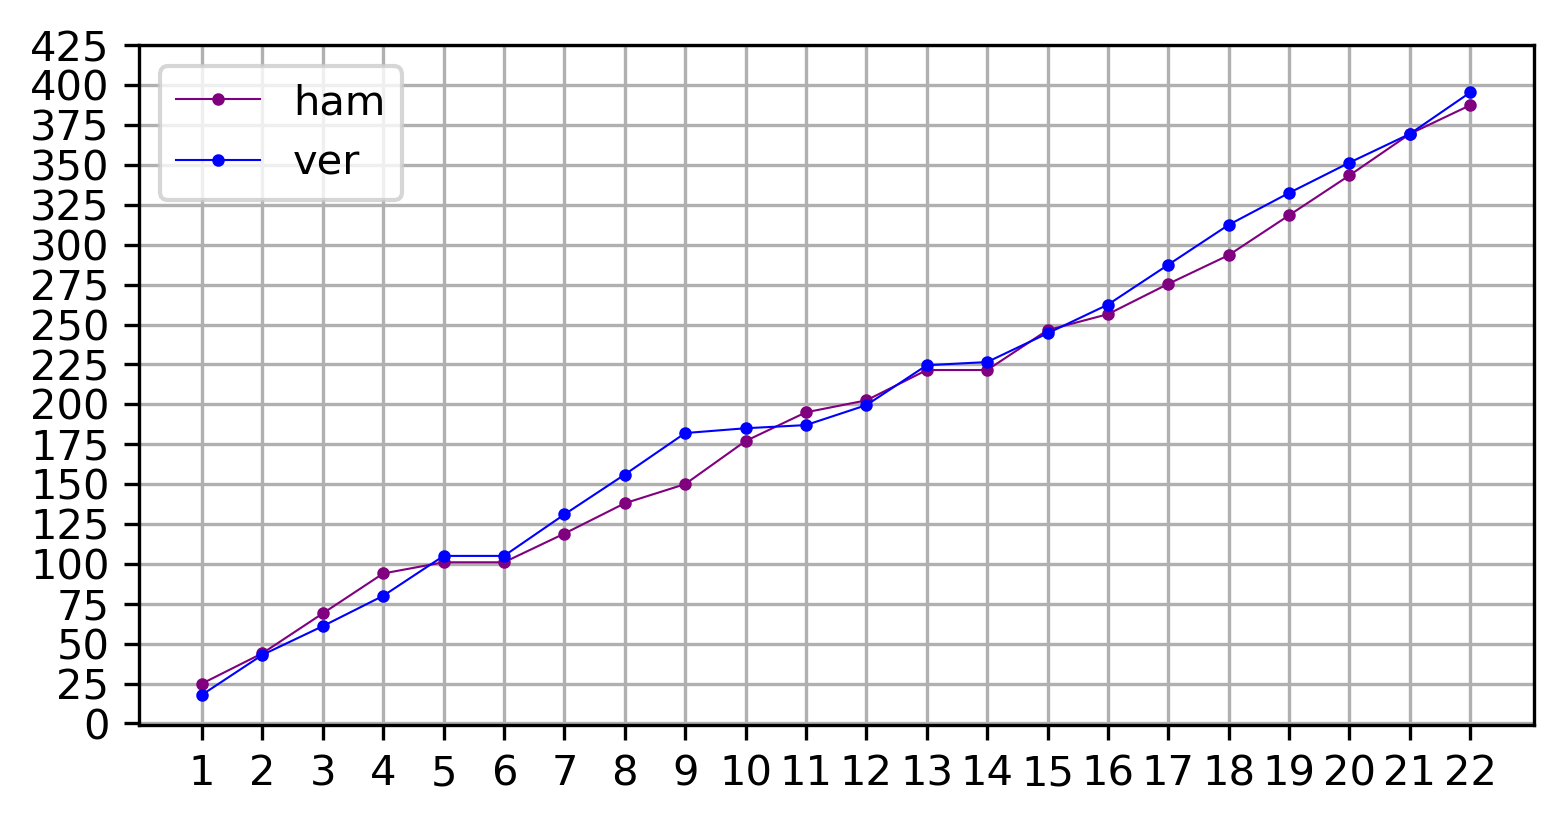

In [5]:
plt.figure(figsize=(6,3),dpi=300)
plt.plot(ham_df['round'],ham_df.points,label='ham',color='purple',marker = 'o',markersize=2,linewidth=0.5)
plt.plot(ver_df['round'],ver_df.points,label='ver',color='blue',marker = 'o',markersize=2,linewidth=0.5)
plt.xticks(ver_df['round'])
plt.yticks(range(0,450,25))
plt.legend()
plt.grid()
plt.show()